In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
plt.style.use('ggplot')

%matplotlib inline

In [2]:
df = pd.read_csv('metrics/training_confusion.csv')

In [3]:
breeds = np.unique(df['actual'].values)

In [4]:
cm = confusion_matrix(df['actual'], df['pred'], labels=breeds)
#sns.set(font_scale=1)

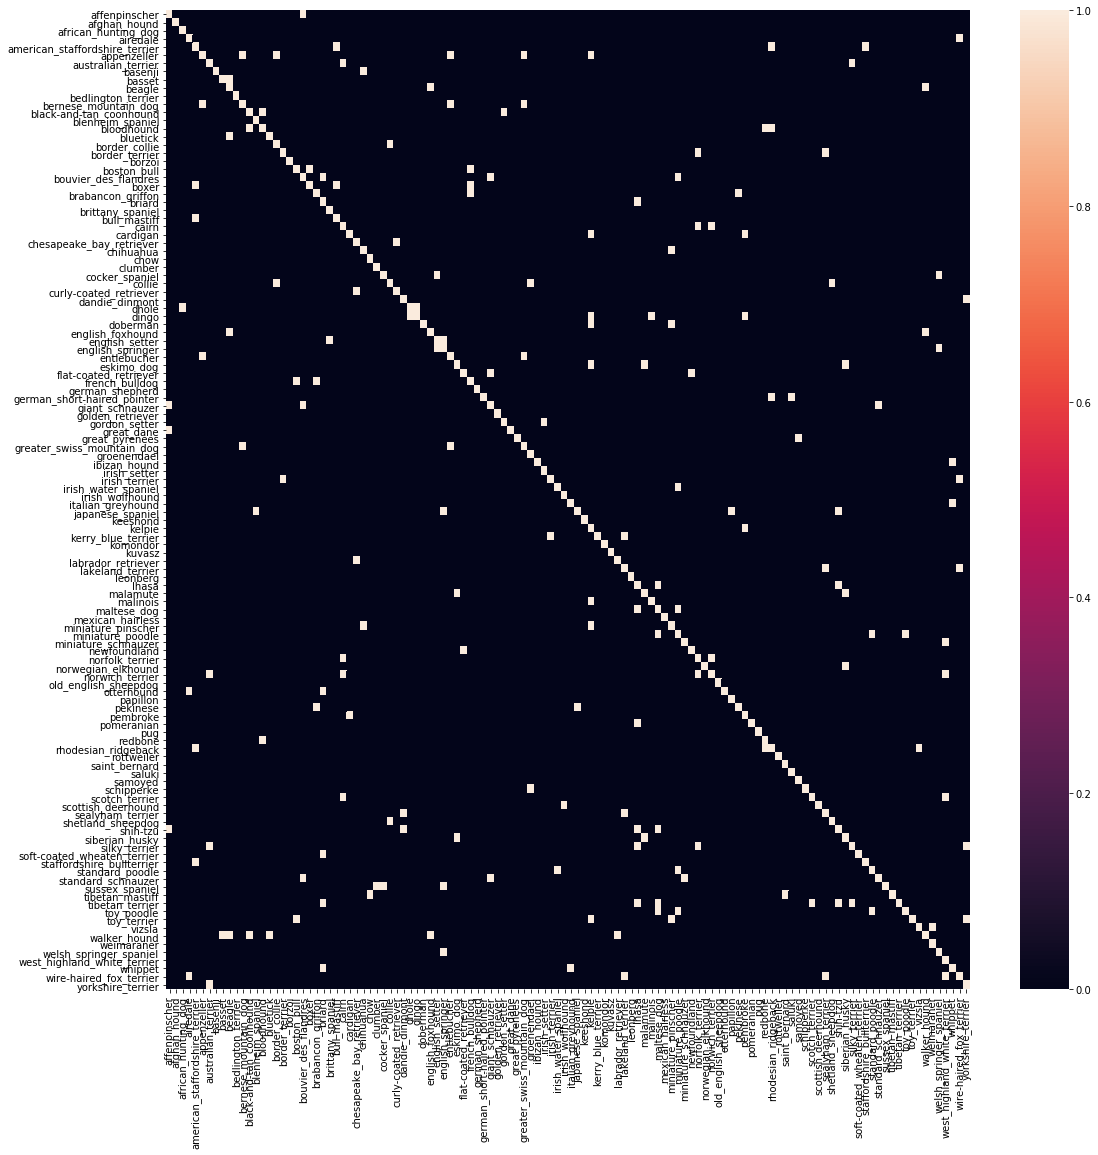

In [5]:
fig, ax = plt.subplots(figsize=(18, 18))
_ = sns.heatmap(cm, ax=ax, yticklabels=breeds, xticklabels=breeds, robust=True)

In [7]:
df['count'] = 1

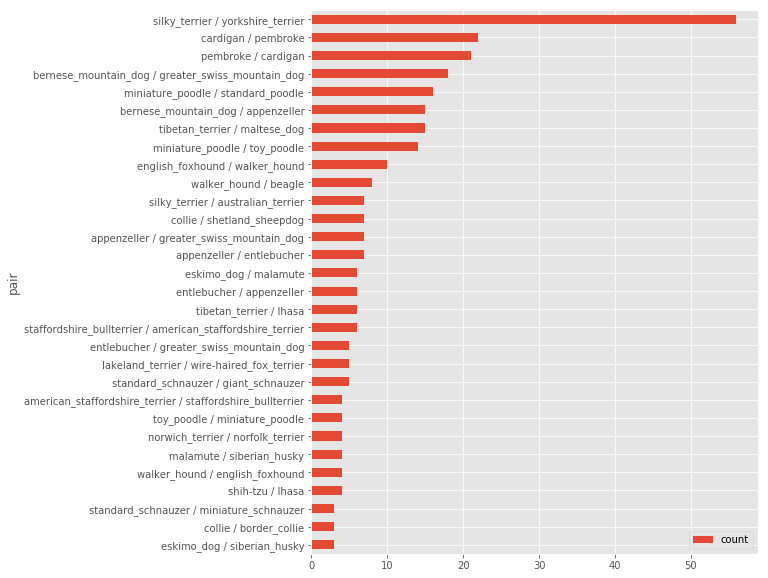

In [18]:
misclass_df = df[df['actual'] != df['pred']].groupby(['actual', 'pred']).sum().sort_values(['count'], ascending=False).reset_index()
misclass_df['pair'] = misclass_df['actual'] + ' / ' + misclass_df['pred']
misclass_df = misclass_df[['pair', 'count']].take(range(30))

misclass_df.sort_values(['count']).plot.barh(figsize=(8, 10), x=misclass_df['pair'])